In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os

In [4]:
import tensorflow as tf

2024-02-15 12:42:18.082348: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 12:42:18.082443: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 12:42:18.199811: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
def process_image(image_path, IMG_SIZE=224):

    image = tf.io.read_file(image_path)
    image = tf.io.decode_image(image, channels=3, expand_animations= False)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    return image

In [6]:
images_loc = []
labels = []
for i in os.listdir("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/cardboard"):
    images_loc.append(process_image("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/cardboard"+"/"+i))
    labels.append(0)
for i in os.listdir("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/glass"):
    images_loc.append(process_image("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/glass"+"/"+i))
    labels.append(1)
for i in os.listdir("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal"):
    images_loc.append(process_image("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal"+"/"+i))
    labels.append(2)
for i in os.listdir("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/paper"):
    images_loc.append(process_image("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/paper"+"/"+i))
    labels.append(3)
for i in os.listdir("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/plastic"):
    images_loc.append(process_image("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/plastic"+"/"+i))
    labels.append(4)
for i in os.listdir("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/trash"):
    images_loc.append(process_image("/kaggle/input/garbage-classification/Garbage classification/Garbage classification/trash"+"/"+i))
    labels.append(5)

In [79]:
classnames = np.array(["cardboard", "glass", "metal", "paper", "plastic", "trash"])

In [7]:
images_loc = np.array(images_loc)
labels = np.array(labels)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_testy, y_train, y_testy = train_test_split(images_loc, labels, test_size = 0.3)

In [16]:
X_val, X_test, y_val, y_test = train_test_split(X_testy, y_testy, test_size = 0.5)

In [20]:
len(X_test), len(y_test)

(380, 380)

In [81]:
import matplotlib.pyplot as plt
def show_25_images(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.title(classnames[labels[i]])
        plt.axis("off")

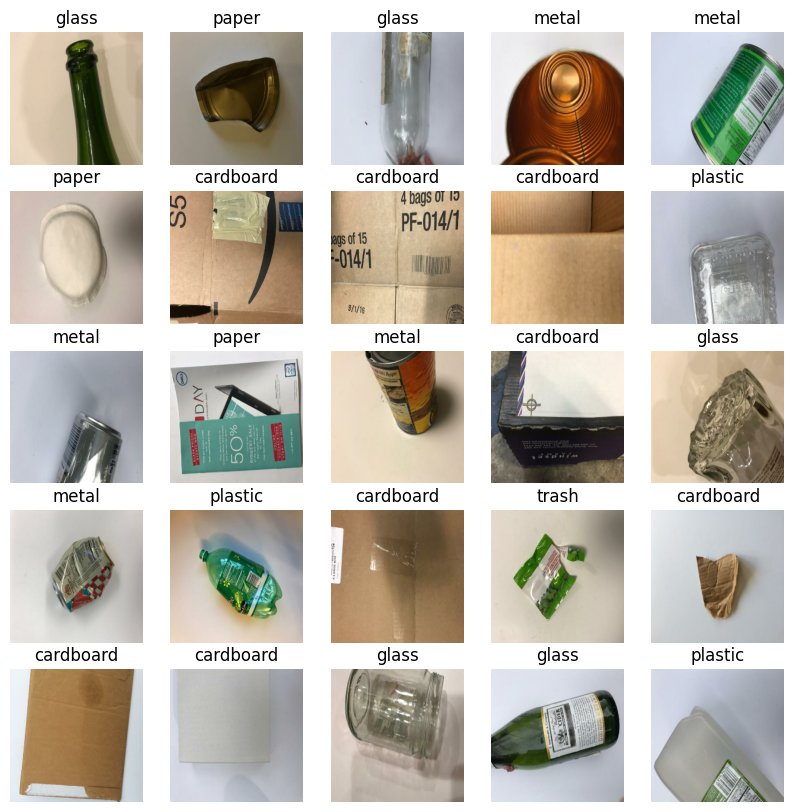

In [83]:
show_25_images(X_train, y_train)

## Using MobileNetV2

In [23]:
import tensorflow_hub as hub
model = tf.keras.Sequential([
   hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/100-224-classification/versions/2",
               trainable=True, arguments=dict(batch_norm_momentum=0.997))
])
model.add(tf.keras.layers.Dense(6, activation='softmax'))
model.build([None, 224, 224, 3]) 

Attaching model 'google/mobilenet-v2/tensorflow2/100-224-classification/2' to your Kaggle notebook...


In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dense_1 (Dense)             (None, 6)                 6012      
                                                                 
Total params: 3546277 (13.53 MB)
Trainable params: 3512165 (13.40 MB)
Non-trainable params: 34112 (133.25 KB)
_________________________________________________________________


In [26]:
model.fit(x = X_train, 
          y = y_train,
          epochs=100,
          validation_data = (X_val, y_val))

Epoch 1/100
56/56 [==============================] - 28s 113ms/step - loss: 1.3148 - accuracy: 0.6550 - val_loss: 24.4243 - val_accuracy: 0.2137
Epoch 2/100
56/56 [==============================] - 5s 94ms/step - loss: 1.0494 - accuracy: 0.7755 - val_loss: 17.0470 - val_accuracy: 0.1293
Epoch 3/100
56/56 [==============================] - 5s 94ms/step - loss: 0.7334 - accuracy: 0.8247 - val_loss: 7.7132 - val_accuracy: 0.4617
Epoch 4/100
56/56 [==============================] - 5s 94ms/step - loss: 0.5359 - accuracy: 0.8744 - val_loss: 18.4119 - val_accuracy: 0.2190
Epoch 5/100
56/56 [==============================] - 5s 94ms/step - loss: 0.4140 - accuracy: 0.9106 - val_loss: 4.8654 - val_accuracy: 0.6464
Epoch 6/100
56/56 [==============================] - 5s 94ms/step - loss: 0.4665 - accuracy: 0.8954 - val_loss: 4.7061 - val_accuracy: 0.6306
Epoch 7/100
56/56 [==============================] - 5s 94ms/step - loss: 0.5384 - accuracy: 0.8840 - val_loss: 5.6415 - val_accuracy: 0.5910
E

In [28]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 28ms/step - loss: 3.6319 - accuracy: 0.6526


[3.6319355964660645, 0.6526315808296204]

In [29]:
model.save("mobile_net_v2_model.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### The accuracy isnt high, trying other models

## Using Inception-ResNet-v2

In [40]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/inception-resnet-v2/frameworks/TensorFlow2/variations/classification/versions/2")
])
m.add(tf.keras.layers.Dense(6, activation='softmax'))


Attaching model 'google/inception-resnet-v2/tensorflow2/classification/2' to your Kaggle notebook...


In [41]:
m.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
m.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1001)              55875273  
                                                                 
 dense_3 (Dense)             (None, 6)                 6012      
                                                                 
Total params: 55881285 (213.17 MB)
Trainable params: 6012 (23.48 KB)
Non-trainable params: 55875273 (213.15 MB)
_________________________________________________________________


In [43]:
history = m.fit(x = X_train, 
          y = y_train,
          epochs=100,
          validation_data = (X_val, y_val),
          batch_size = 32)

Epoch 1/100
56/56 [==============================] - 28s 220ms/step - loss: 1.3239 - accuracy: 0.6205 - val_loss: 0.7294 - val_accuracy: 0.7704
Epoch 2/100
56/56 [==============================] - 7s 121ms/step - loss: 0.6026 - accuracy: 0.7885 - val_loss: 0.6757 - val_accuracy: 0.7810
Epoch 3/100
56/56 [==============================] - 7s 120ms/step - loss: 0.4760 - accuracy: 0.8343 - val_loss: 0.6155 - val_accuracy: 0.7863
Epoch 4/100
56/56 [==============================] - 7s 120ms/step - loss: 0.4008 - accuracy: 0.8586 - val_loss: 0.6032 - val_accuracy: 0.7863
Epoch 5/100
56/56 [==============================] - 7s 121ms/step - loss: 0.3469 - accuracy: 0.8756 - val_loss: 0.5557 - val_accuracy: 0.8153
Epoch 6/100
56/56 [==============================] - 7s 120ms/step - loss: 0.3289 - accuracy: 0.8863 - val_loss: 0.5510 - val_accuracy: 0.8179
Epoch 7/100
56/56 [==============================] - 7s 121ms/step - loss: 0.2891 - accuracy: 0.8954 - val_loss: 0.5783 - val_accuracy: 0.810

In [45]:
loss, acc = m.evaluate(X_test, y_test)
print("The accuracy of the model is {:.3f}\nThe Loss in the model is {:.3f}".format(acc,loss))

12/12 [==============================] - 3s 273ms/step - loss: 1.0914 - accuracy: 0.8184
The accuracy of the model is 0.818
The Loss in the model is 1.091


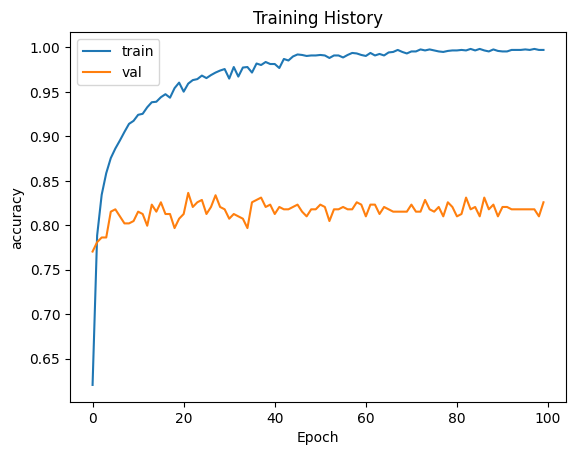

In [51]:
import matplotlib.pyplot as plt
def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

# show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

In [67]:
model.save("resnet.h5")

## Custom CNN

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

input_shape = (224, 224, 3)  
num_classes = 6

model_cnn = Sequential()

model_cnn = Sequential()
   
model_cnn.add(Conv2D(32,(3,3), padding='same', input_shape=input_shape,activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2))) 
model_cnn.add(BatchNormalization())
model_cnn.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2))) 
model_cnn.add(BatchNormalization())
model_cnn.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2))) 
model_cnn.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(64,activation='relu'))
model_cnn.add(Dense(num_classes,activation='softmax'))

model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_cnn.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_8 (Bat  (None, 224, 224, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 batch_normalization_9 (Bat  (None, 112, 112, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_49 (Conv2D)          (None, 112, 112, 32)      9248      
                                                     

In [72]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)


In [73]:
model_cnn.fit(x = X_train, 
          y = y_train,
          epochs=100,
          validation_data = (X_val, y_val),
          batch_size = 32, 
          callbacks=[checkpoint_callback])

Epoch 1/100
55/56 [============================>.] - ETA: 0s - loss: 1.4236 - accuracy: 0.5068
Epoch 1: val_accuracy improved from -inf to 0.15567, saving model to best_model.h5
56/56 [==============================] - 7s 54ms/step - loss: 1.4226 - accuracy: 0.5074 - val_loss: 2.1589 - val_accuracy: 0.1557
Epoch 2/100
55/56 [============================>.] - ETA: 0s - loss: 0.9867 - accuracy: 0.6534
Epoch 2: val_accuracy improved from 0.15567 to 0.25858, saving model to best_model.h5
56/56 [==============================] - 2s 40ms/step - loss: 0.9898 - accuracy: 0.6527 - val_loss: 2.0970 - val_accuracy: 0.2586
Epoch 3/100
55/56 [============================>.] - ETA: 0s - loss: 0.8210 - accuracy: 0.7119
Epoch 3: val_accuracy improved from 0.25858 to 0.29288, saving model to best_model.h5
56/56 [==============================] - 2s 39ms/step - loss: 0.8211 - accuracy: 0.7121 - val_loss: 2.1780 - val_accuracy: 0.2929
Epoch 4/100
55/56 [============================>.] - ETA: 0s - loss: 0

In [96]:
model_cnn.evaluate(X_test, y_test)

12/12 [==============================] - 1s 51ms/step - loss: 2.3201 - accuracy: 0.6316


[2.320120334625244, 0.6315789222717285]

## To predict

Since resnet gave the best results, lets use that for predictions

Enter the image path for prediction :  /kaggle/input/garbage-classification/Garbage classification/Garbage classification/paper/paper103.jpg


1/1 [==============================] - 0s 32ms/step


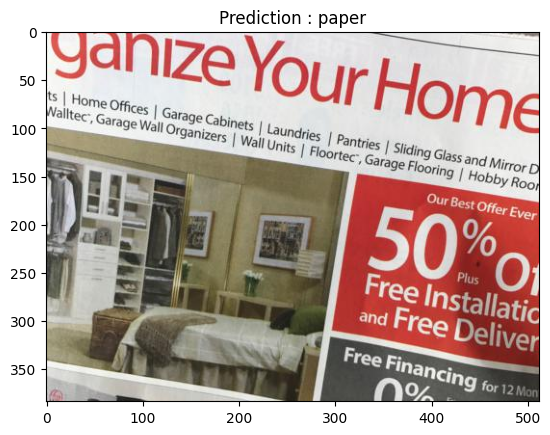

In [94]:
from PIL import Image
img_path = input("Enter the image path for prediction : ")
image = process_image(img_path) 
image = np.expand_dims(image, axis=0) 
p = np.argmax(resnet.predict(image))
a = plt.imread(img_path)
plt.title(f"Prediction : {classnames[p]}")
plt.imshow(a)

